# Modeling

### Model
A certain **specification** of the mathematical (or probabilistic) relationship between different varibles

### Definition of machine learning
The model obtained by learning from data is called **predictive modeling** of **data mining**

Type of machine learning:
* Supervised models: data are labeled with the correct answer
* Unsupervised models: data are not labeled with the correct answer
* Semi-supervised models: only part of the data is labeled with the correct answer
* Online models: need to be continuously adjusted based on new data
* Reinforcement models: after making a series of predictions, a **signal** is obtained to indicate how well it did

### Overfitting
The model is perfect for training data, but performs poorly on any new data

### Underfitting
This model is not very good at performing with training data

## Overfitting and underfiting

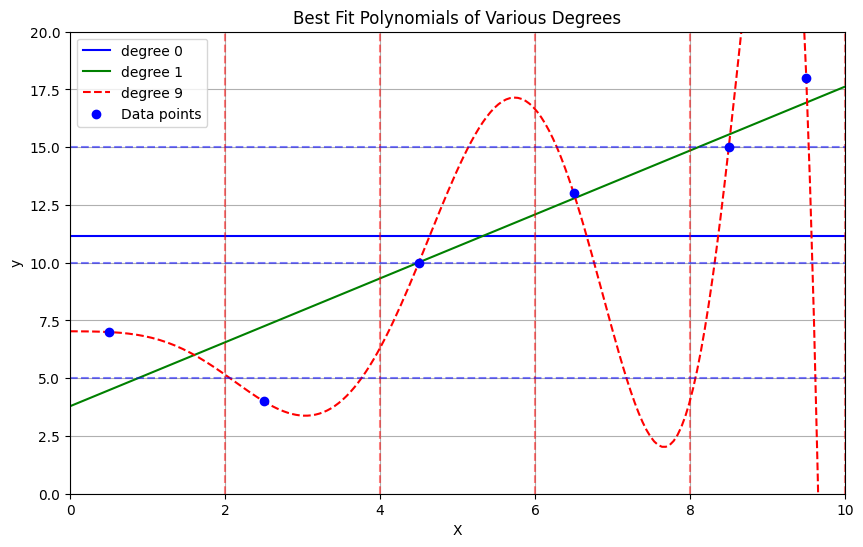

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data points (diperkirakan berdasarkan gambar)
X = np.array([0.5, 2.5, 4.5, 6.5, 8.5, 9.5]).reshape(-1, 1)
y = np.array([7, 4, 10, 13, 15, 18])

# Fit polynomial regressions of different degrees
degrees = [0, 1, 9]
plt.figure(figsize=(10, 6))

for degree in degrees:
    # Transform the input data to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate points for the curve
    X_smooth = np.linspace(0, 10, 200).reshape(-1, 1)
    X_smooth_poly = poly_features.transform(X_smooth)
    y_smooth = model.predict(X_smooth_poly)

    # Plot the polynomial fit
    if degree == 0:
        plt.plot(X_smooth, y_smooth, 'b-', label=f'degree {degree}')
    elif degree == 1:
        plt.plot(X_smooth, y_smooth, 'g-', label=f'degree {degree}')
    else:
        plt.plot(X_smooth, y_smooth, 'r--', label=f'degree {degree}')

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points', zorder=5)

# Add vertical dashed lines (red)
for x in [2, 4, 6, 8, 10]:
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.5)

# Add horizontal dashed lines (blue)
for y_val in [5, 10, 15]:
    plt.axhline(y=y_val, color='blue', linestyle='--', alpha=0.5)

# Add labels, title, and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Polynomials of Various Degrees')
plt.legend()
plt.grid(True)
plt.ylim(0, 20)
plt.xlim(0, 10)
plt.show()

In [3]:
import random
from typing import TypeVar, List, Tuple
X = TypeVar('X')    # generic type to represent a data point

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split data into fractions [prob, 1 - prob]"""
    data = data[:]                    # Make a shallow copy
    random.shuffle(data)              # because shuffle modifies the list.
    cut = int(len(data) * prob)       # Use prob to find a cutoff
    return data[:cut], data[cut:]     # and split the shuffled list there.

data = [n for n in range(1000)]
train, test = split_data(data, 0.75)

# The proportions should be correct
assert len(train) == 750
assert len(test) == 250

# And the original data should be preserved (in some order)
assert sorted(train + test) == data

In [4]:
Y = TypeVar('Y')  # generic type to represent output variables

def train_test_split(xs: List[X],
                     ys: List[Y],
                     test_pct: float) -> Tuple[List[X], List[X], List[Y], List[Y]]:
    # Generate the indices and split them.
    idxs = [i for i in range(len(xs))]
    train_idxs, test_idxs = split_data(idxs, 1 - test_pct)

    return ([xs[i] for i in train_idxs],  # x_train
            [xs[i] for i in test_idxs],   # x_test
            [ys[i] for i in train_idxs],  # y_train
            [ys[i] for i in test_idxs])   # y_test

xs = [x for x in range(1000)]  # xs are 1 ... 1000
ys = [2 * x for x in xs]       # each y_i is twice x_i
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)

# Check that the proportions are correct
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250

# Check that the corresponding data points are paired correctly.
assert all(y == 2 * x for x, y in zip(x_train, y_train))
assert all(y == 2 * x for x, y in zip(x_test, y_test))


```python
model = SomekindOfModel()
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.33)
model.train(x_train, y_train)
performance = model.test(x_test, y_test)
```
1. Training: to build multiple models
2. Verification: select model based on data
3. Testing: determine whether the final model is usable

## Correctness
|---|Actual True|Actual False|
|---|---|---|
|Predicted True| True Positive|False Positive
|Predicted False| False Negative|True Negative

Each data can be classified into one of four categories
* True Positive (TP, true positive)
* False Positive (FP, false positive)
* False Negative (FN, false negative)
* True Negative (TN, true negative)

## Accuracy
Ratio of correct predictions
```
accuracy = TP+TN/total
```


In [6]:
def accuracy(tp: int, fp: int, fn: int, tn: int) -> float:
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

assert accuracy(70, 4930, 13930, 981070) == 0.98114

## Precision
The ratio of correct predictions among all the results predicted as positive

```
precision = TP/TP+FP
```

In [7]:
def precision(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp / (tp + fp)

assert precision(70, 4930, 13930, 981070) == 0.014

## Recall
The ratio of all true positive results to those predicted correctly

```
recall = TP/TP+FN
```

In [8]:
def recall(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp / (tp + fn)

assert recall(70, 4930, 13930, 981070) == 0.005

## F1 score

The evaluation score calculated using precision and recall

```
recall = 2*precision*recall/(precision+recall)
```
It can also be regarded as the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of precision and recall, and its value must be between precision and recall

In [9]:
def f1_score(tp: int, fp: int, fn: int, tn: int) -> float:
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)

    return 2 * p * r / (p + r)

### Example: Chance of having leukemia

|---|Has leukemia|Does not have leukemia|Total|
|---|---|---|---|
|Name is Luke| 70 (TP)|4,930 (FP)|5,000
|Name is not Luke| 13930 (FN)|981,070 (TN)|995,000
|Total| 14,000|986,000|1,000,000

In [10]:
tp = 70
fp = 4930
fn = 13930
tn = 981070

In [11]:
accuracy(tp,fp,fn,tn)

0.98114

In [12]:
precision(tp,fp,fn,tn)

0.014

In [13]:
recall(tp,fp,fn,tn)

0.005

In [14]:
f1_score(tp,fp,fn,tn)

0.00736842105263158